## 2.3 Fundamentals of Visualization Libraries Part 1- Matplotlib

### Importing Libraries and Data

In [6]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import os

In [2]:
# Creating path to import dataset
path = r'C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python'

In [3]:
file_name = 'newyorkcitibike.csv'

In [4]:
dataset_path = os.path.join(path, file_name)

In [12]:
# loading data in chunks
chunk_size = 100000  
chunks = pd.read_csv(dataset_path, chunksize=chunk_size, low_memory=False)

In [13]:
all_data = []

In [14]:
# Loop through each chunk and store it
for chunk in chunks:
    all_data.append(chunk)

In [15]:
# Concatenate them into one DataFrame
df = pd.concat(all_data, ignore_index=True)

In [16]:
df.shape

(29838806, 16)

### Checking data set for any cleaning

In [18]:
# Checking for duplicates
duplicates = df.duplicated()

In [19]:
print(duplicates)

0           False
1           False
2           False
3           False
4           False
            ...  
29838801    False
29838802    False
29838803    False
29838804    False
29838805    False
Length: 29838806, dtype: bool


In [20]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

In [21]:
print(f"Number of duplicates: {num_duplicates}")

Number of duplicates: 0


In [22]:
# Checking data types
print(df.dtypes)

ride_id                object
rideable_type          object
start_time             object
end_time               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object


In [23]:
# Convert 'start_time', 'end_time', and 'date' to datetime
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [24]:
# Check for missing values in the dataset
print(df.isnull().sum())

ride_id                   0
rideable_type             0
start_time                0
end_time                  0
start_station_name       49
start_station_id         49
end_station_name      70092
end_station_id        70092
start_lat                 0
start_lng                 0
end_lat               37392
end_lng               37392
member_casual             0
date                      0
avgTemp                 640
_merge                    0
dtype: int64


In [25]:
# Drop rows with missing start station information
df.dropna(subset=['start_station_name', 'start_station_id'], inplace=True)

In [26]:
# Drop rows with missing end station information
df.dropna(subset=['end_station_name', 'end_station_id'], inplace=True)

In [27]:
# Drop rows with missing latitudes and longitudes
df.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'], inplace=True)

In [28]:
# Drop rows with missing temperature
df.dropna(subset=['avgTemp'], inplace=True)

In [29]:
# Drop the '_merge' column
df.drop(columns=['_merge'], inplace=True)

In [30]:
df.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


### Derive new columns

In [31]:
# Calculate ride duration (in minutes)
df['ride_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60  # Duration in minutes

In [32]:
# Extract year, month, day, weekday, hour from 'end_time'
df['end_year'] = df['end_time'].dt.year
df['end_month'] = df['end_time'].dt.month
df['end_day'] = df['end_time'].dt.day
df['end_weekday'] = df['end_time'].dt.weekday
df['end_hour'] = df['end_time'].dt.hour

In [33]:
# Check for missing columns to ensure this worked properly
print(df.isnull().sum())

ride_id               0
rideable_type         0
start_time            0
end_time              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
date                  0
avgTemp               0
ride_duration         0
end_year              0
end_month             0
end_day               0
end_weekday           0
end_hour              0
dtype: int64


In [34]:
# Extract year, month, day, weekday, hour from 'start_time'
df['start_year'] = df['start_time'].dt.year
df['start_month'] = df['start_time'].dt.month
df['start_day'] = df['start_time'].dt.day
df['start_weekday'] = df['start_time'].dt.weekday  # Monday=0, Sunday=6
df['start_hour'] = df['start_time'].dt.hour

In [35]:
# Save updated data set 
save_path = r'C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python'

In [39]:
file_path = os.path.join(save_path, 'citibike_data.csv')

In [40]:
# Save the DataFrame to CSV 
df.to_csv(file_path, index=False)

In [3]:
# Import data set back to notebook (after closing application and opening again)
# Creating path to import dataset
path = r'C:\Users\ariel\OneDrive\Desktop\School work\Data Visualizations with Python'

In [4]:
file_name = 'citibike_data.csv'

In [7]:
dataset_path = os.path.join(path, file_name)

In [8]:
# loading data in chunks
chunk_size = 100000  
chunks = pd.read_csv(dataset_path, chunksize=chunk_size, low_memory=False)

In [9]:
all_data = []

In [10]:
# Loop through each chunk and store it
for chunk in chunks:
    all_data.append(chunk)

In [11]:
# Concatenate them into one DataFrame
df = pd.concat(all_data, ignore_index=True)

### Create a randomized sample data set to conduct analysis

In [12]:
# Due to the largeness of this dataset, it is necessary to create a sample dataset containing 5% of the original data set 
# Randomly sample 5% of the data
df_sample = df.sample(frac=0.05, random_state=42)

In [13]:
df_sample.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_year,end_month,end_day,end_weekday,end_hour,start_year,start_month,start_day,start_weekday,start_hour
26912495,4337FD4D0A20576C,electric_bike,2022-11-23 08:40:22.577,2022-11-23 08:58:17.192,W 100 St & Manhattan Ave,7538.14,W 33 St & 10 Ave,6492.04,40.794934,-73.964464,...,2022,11,23,2,8,2022,11,23,2,8
2342555,FB88D9E61B43D316,classic_bike,2022-03-24 15:27:51.105,2022-03-24 15:45:51.560,Hanson Pl & Ashland Pl,4395.07,Pioneer St & Van Brunt St,4169.04,40.685068,-73.977908,...,2022,3,24,3,15,2022,3,24,3,15
27834596,5544DB17A0D093A9,classic_bike,2022-11-28 11:57:41.365,2022-11-28 12:10:47.169,E 67 St & Park Ave,6932.14,Grand Army Plaza & Central Park S,6839.1,40.767801,-73.965921,...,2022,11,28,0,12,2022,11,28,0,11
10598163,B925440B0A8006C0,electric_bike,2022-06-29 19:20:49.475,2022-06-29 19:27:44.569,Center Blvd & 51 Ave,6179.07,Vernon Blvd & 50 Ave,6170.02,40.743366,-73.959607,...,2022,6,29,2,19,2022,6,29,2,19
25332849,558134615D853AC6,classic_bike,2022-10-08 21:21:56.985,2022-10-08 21:33:24.605,Stewart Ave & Johnson Ave,5123.07,Scholes St & Manhattan Ave,5108.01,40.708690,-73.925870,...,2022,10,8,5,21,2022,10,8,5,21


In [14]:
df_sample.shape

(1488414, 26)

In [15]:
df_sample.columns

Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'ride_duration', 'end_year',
       'end_month', 'end_day', 'end_weekday', 'end_hour', 'start_year',
       'start_month', 'start_day', 'start_weekday', 'start_hour'],
      dtype='object')

### Basic plotting with Pandas (using sample set for the rest of the analysis)

In [16]:
df_temp = df_sample.set_index('date')

In [17]:
df_temp.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_year,end_month,end_day,end_weekday,end_hour,start_year,start_month,start_day,start_weekday,start_hour
date,,,,,,,,,,,,,,,,,,,,,
2022-11-23,4337FD4D0A20576C,electric_bike,2022-11-23 08:40:22.577,2022-11-23 08:58:17.192,W 100 St & Manhattan Ave,7538.14,W 33 St & 10 Ave,6492.04,40.794934,-73.964464,...,2022,11,23,2,8,2022,11,23,2,8
2022-03-24,FB88D9E61B43D316,classic_bike,2022-03-24 15:27:51.105,2022-03-24 15:45:51.560,Hanson Pl & Ashland Pl,4395.07,Pioneer St & Van Brunt St,4169.04,40.685068,-73.977908,...,2022,3,24,3,15,2022,3,24,3,15
2022-11-28,5544DB17A0D093A9,classic_bike,2022-11-28 11:57:41.365,2022-11-28 12:10:47.169,E 67 St & Park Ave,6932.14,Grand Army Plaza & Central Park S,6839.1,40.767801,-73.965921,...,2022,11,28,0,12,2022,11,28,0,11
2022-06-29,B925440B0A8006C0,electric_bike,2022-06-29 19:20:49.475,2022-06-29 19:27:44.569,Center Blvd & 51 Ave,6179.07,Vernon Blvd & 50 Ave,6170.02,40.743366,-73.959607,...,2022,6,29,2,19,2022,6,29,2,19
2022-10-08,558134615D853AC6,classic_bike,2022-10-08 21:21:56.985,2022-10-08 21:33:24.605,Stewart Ave & Johnson Ave,5123.07,Scholes St & Manhattan Ave,5108.01,40.708690,-73.925870,...,2022,10,8,5,21,2022,10,8,5,21


In [18]:
# Set a lower chunksize
plt.rcParams['agg.path.chunksize'] = 500000  # Lower value for chunksize

<Axes: xlabel='date'>

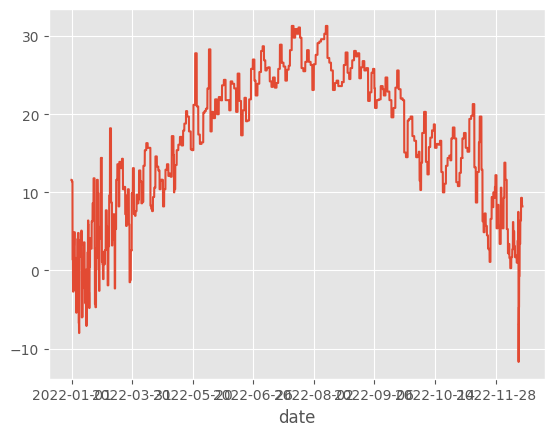

In [84]:
df_temp['avgTemp'].plot()

<Axes: xlabel='date'>

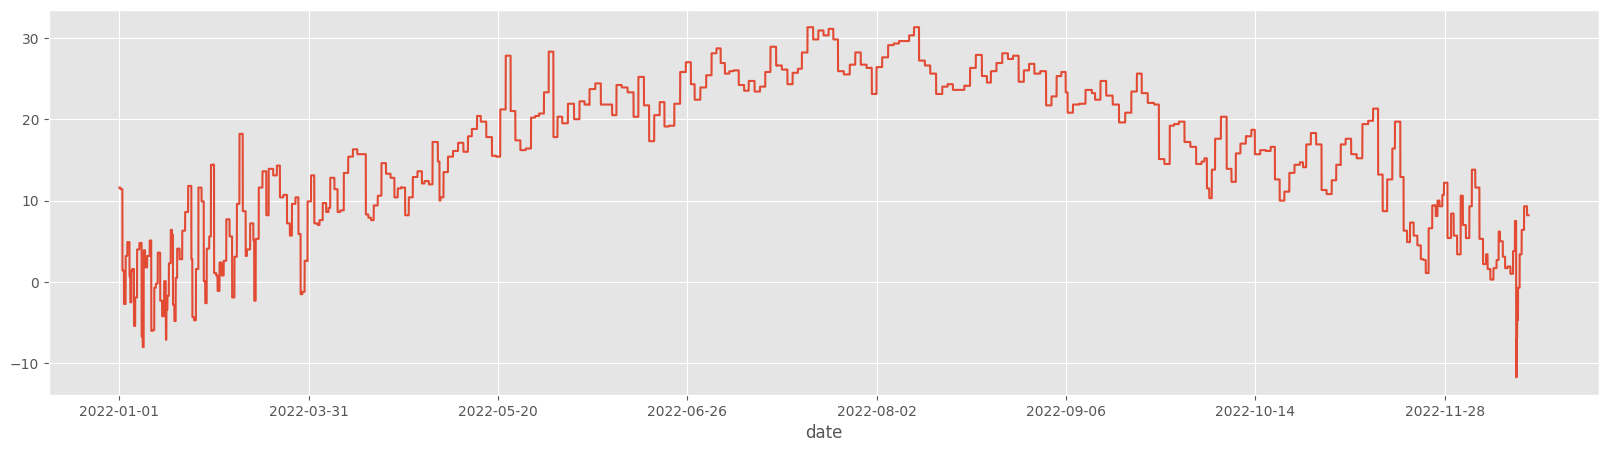

In [62]:
# set figure size 
plt.figure(figsize=(20, 5))
df_temp['avgTemp'].plot()

Without the plt.figure command, the plot was unreadable.

### Procedural approach

In [21]:
# Reducing chunksize further
plt.rcParams['agg.path.chunksize'] = 100000

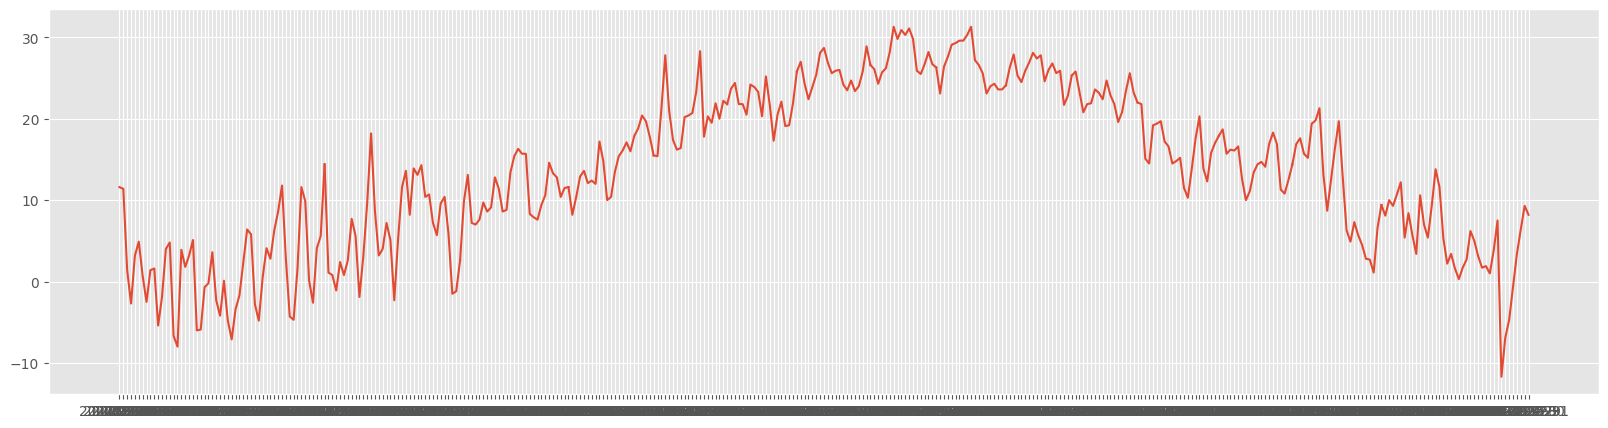

In [63]:
plt.figure(figsize=(20, 5))
plt.plot(df_temp['avgTemp'])
plt.show()

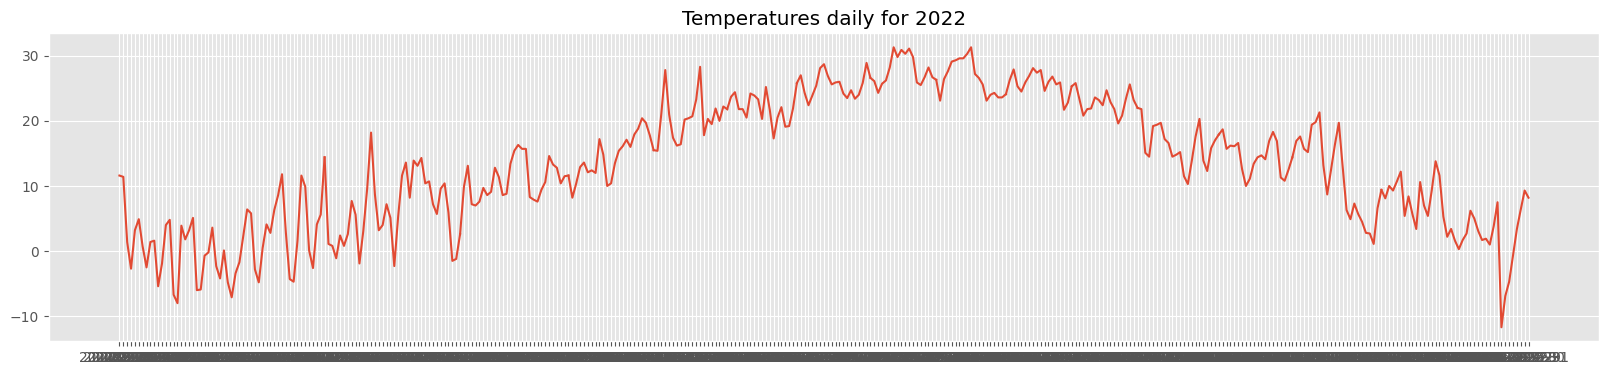

In [64]:
plt.figure(figsize=(20,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp['avgTemp'])
plt.show()

### Aggregate trips

In [27]:
# Groupby the count of the rides 

df_group = pd.DataFrame(df_sample.groupby(['date'])['ride_id'].count()).reset_index()

In [28]:
df_group.head()

,date,ride_id
0,2022-01-01,1042
1,2022-01-02,2071
2,2022-01-03,1630
3,2022-01-04,1764
4,2022-01-05,1772


In [30]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df_sample.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          1488414
left_only           0
right_only          0
Name: count, dtype: int64
Shape of January 1st is (1042, 28)
Shape of January 2nd is (2071, 28)
Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'ride_duration', 'end_year', 'end_month',
       'end_day', 'end_weekday', 'end_hour', 'start_year', 'start_month',
       'start_day', 'start_weekday', 'start_hour', 'bike_rides_daily',
       '_merge'],
      dtype='object')


In [31]:
df_temp.head()

,ride_id,rideable_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_day,end_weekday,end_hour,start_year,start_month,start_day,start_weekday,start_hour,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,D83AF928F9878288,classic_bike,2022-01-01 13:49:57.378,2022-01-01 13:55:48.027,Allen St & Stanton St,5484.09,E 11 St & Avenue B,5659.11,40.722055,-73.989111,...,1,5,13,2022,1,1,5,13,1042,both
2022-01-01,0E58589FA56572B6,classic_bike,2022-01-01 14:56:20.497,2022-01-01 14:57:24.775,E 85 St & York Ave,7146.04,E 85 St & York Ave,7146.04,40.775369,-73.948034,...,1,5,14,2022,1,1,5,14,1042,both
2022-01-01,60F0DCB12A6DD8DA,classic_bike,2022-01-01 16:42:49.227,2022-01-01 16:45:12.067,W 16 St & The High Line,6233.05,W 22 St & 10 Ave,6306.06,40.743349,-74.006818,...,1,5,16,2022,1,1,5,16,1042,both
2022-01-01,8EEBE5D308B3ED6A,classic_bike,2022-01-01 17:27:37.857,2022-01-01 17:33:47.527,Plaza St East & Flatbush Ave,4010.01,Flatbush Ave & Ocean Ave,3704.04,40.673134,-73.969106,...,1,5,17,2022,1,1,5,17,1042,both
2022-01-01,0ACB9A26880A773E,classic_bike,2022-01-01 01:06:30.245,2022-01-01 01:23:22.149,Front St & Gold St,4927.04,S 4 St & Wythe Ave,5204.05,40.702240,-73.982578,...,1,5,1,2022,1,1,5,1,1042,both


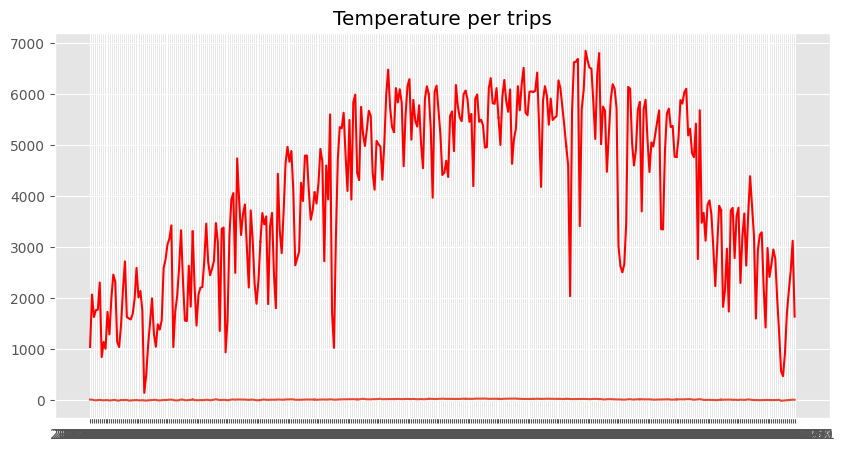

In [50]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['bike_rides_daily'], color = 'red')
plt.show()

### OO Approach

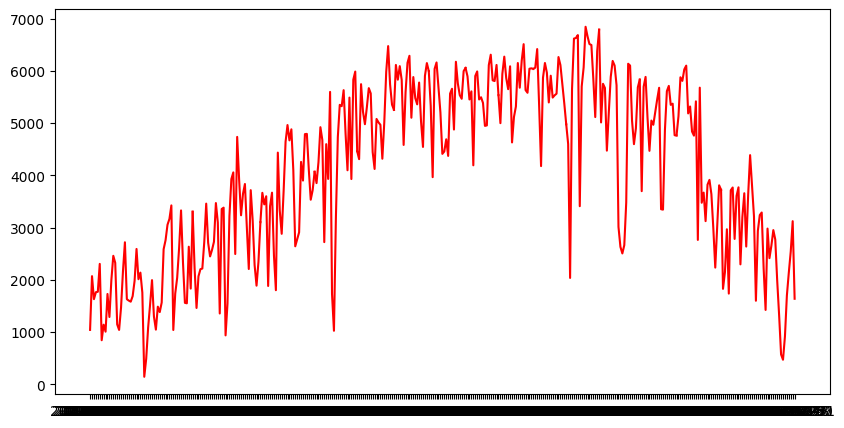

In [33]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")

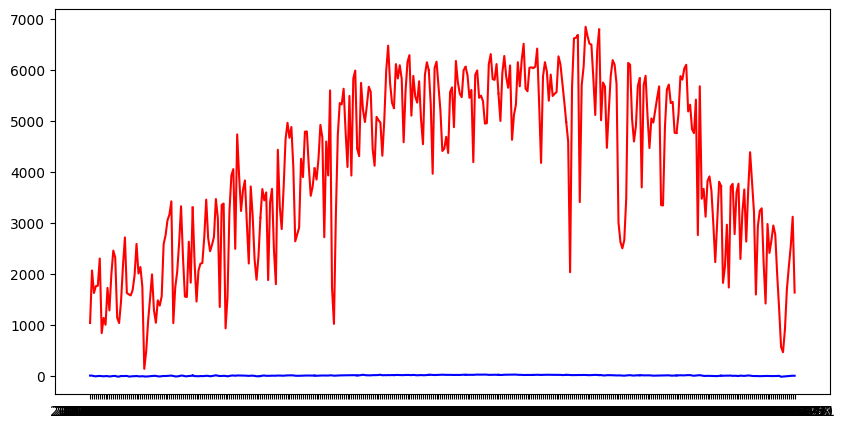

In [34]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "red")
ax.plot(df_temp['avgTemp'], color = 'blue')

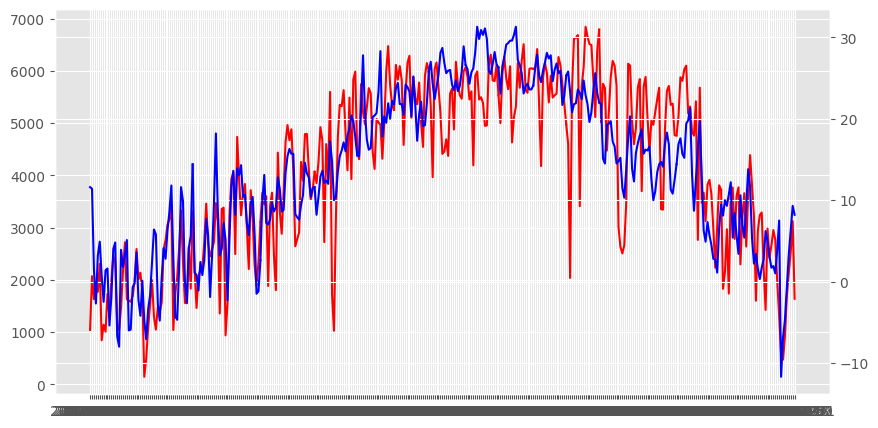

In [49]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp.index, df_temp['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_temp.index, df_temp["avgTemp"], color = "blue")

plt.show()

### Final dual plot

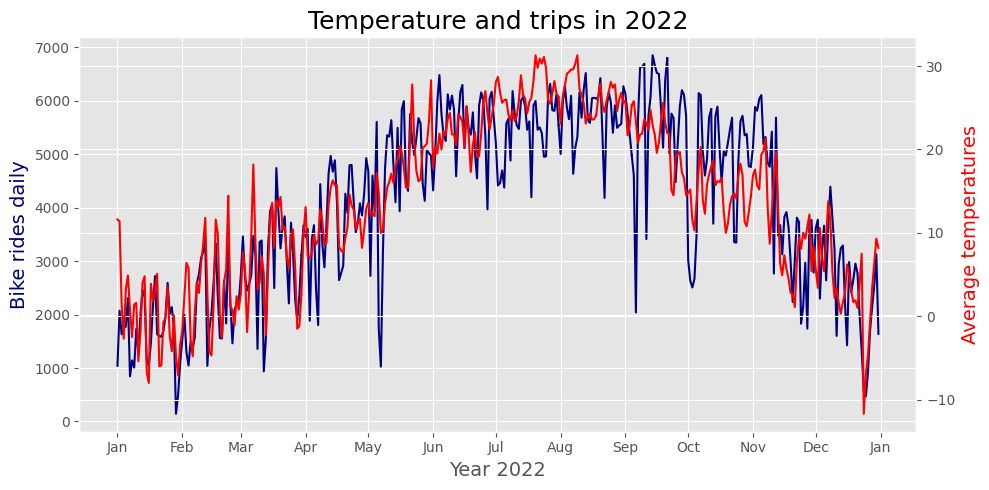

In [54]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label


ax2 = ax.twinx()

# Make a plot with the temperatures on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)

# Set the x-ticks to show only the start of each month (i.e., monthly intervals)
# Use `MonthLocator` to set ticks at the start of each month
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks every month

# Format the x-tick labels to show only the month name (e.g., 'Jan', 'Feb', etc.)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [56]:
# Splitting the plots 
plt.style.use('ggplot')

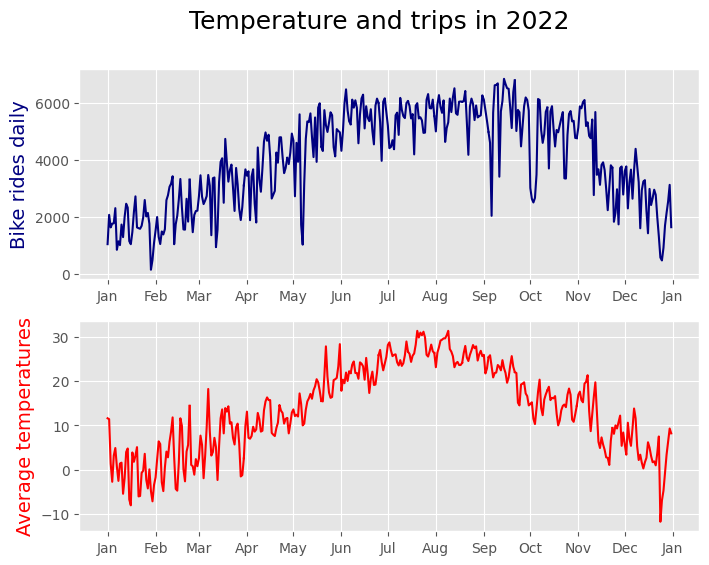

In [59]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Set x-ticks to show the start of each month (i.e., monthly intervals)
ax[0].xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks every month
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b')) 

# Make a plot with the temperatures on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

# Set x-ticks to show the start of each month for the second plot (temperature)
ax[1].xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks every month
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

In [65]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

#### Explanation of coding for the dual axis plot:
fig, ax = plt.subplots(2, figsize=(8,6)) creates a figure with 2 subplots arranged in a single column and the figsize specifies the size of the entire figure. The ax is an array of axis objects so in this case we have 2. 
ax[0] is setting the stage for the first subplot which is pulling from the 'bike_rides_daily' column in the df_temp dataframe, and this line color is set to navy, and titled "Bike rides daily".
I imported the mdates module so that I could format the months on the plots because having every single day on the plot was very crammed and unreadable. I used this for both subplots, and set the format to show only the month ('%b')
ax[1] specifies the average temperatures subplot pulling from the 'avgTemp' column from the df_temp dataframe. In the code, this line is set to the color red and titled "Average temperatures" I did not add in the title, but temperatures are in celcius.
plt.suptitle sets the title for the whole plot.

### Bonus task: creating a histogram for "ride_duration"

In [68]:
df_sample['ride_duration'].describe()

count    1.488414e+06
mean     1.587187e+01
std      1.968088e+02
min     -5.616840e+01
25%      5.788817e+00
50%      1.014492e+01
75%      1.792568e+01
max      1.535352e+05
Name: ride_duration, dtype: float64

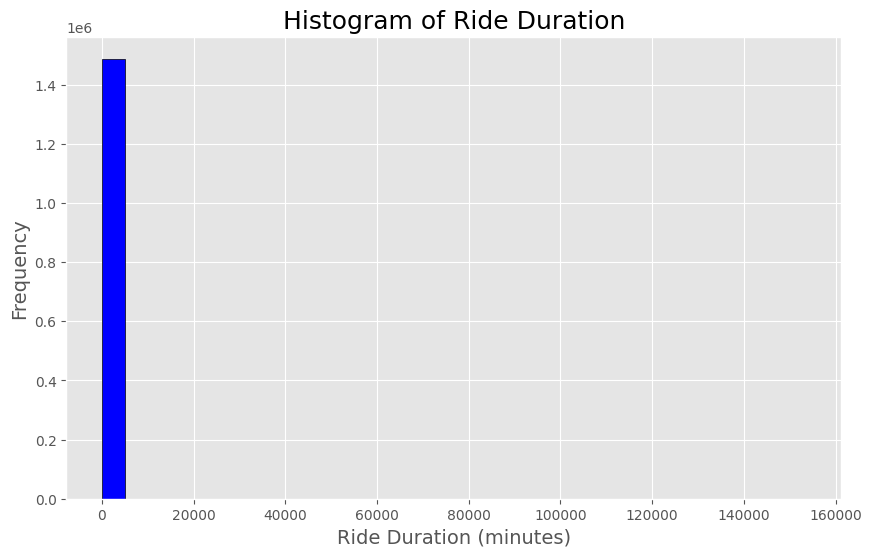

In [78]:
# Create a histogram for the 'ride_duration' column
plt.figure(figsize=(10, 6))  # Set the figure size


plt.hist(df_sample['ride_duration'], bins=30, color='blue', edgecolor='black')  


plt.xlabel('Ride Duration (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Ride Duration', fontsize=18)


plt.show()

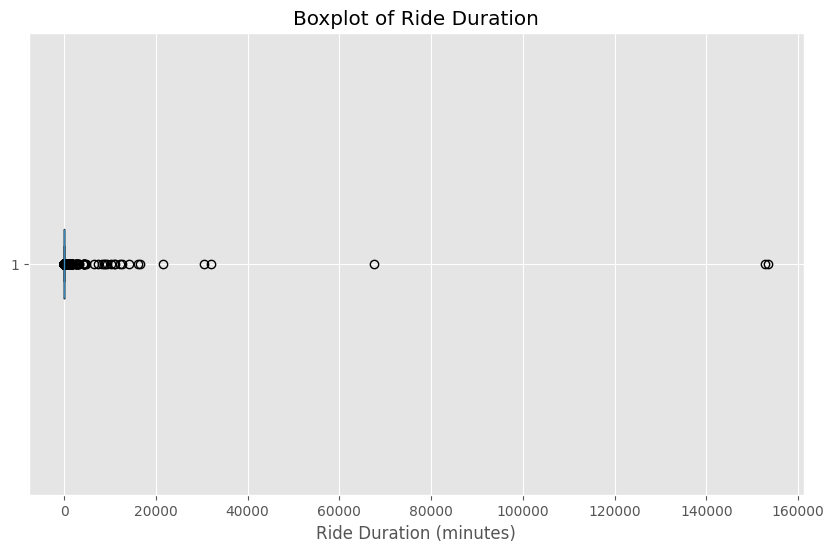

In [69]:
# Create a boxplot for the 'ride_duration' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['ride_duration'], vert=False)
plt.title('Boxplot of Ride Duration')
plt.xlabel('Ride Duration (minutes)')
plt.show()

### Handling outliers and then creating a new histogram

In [70]:
# Calculate Q1 and Q3  for the 'ride_duration' column
Q1 = df['ride_duration'].quantile(0.25)
Q3 = df['ride_duration'].quantile(0.75)

In [71]:
# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

In [72]:
# Define the lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [73]:
# Filter out rows where 'ride_duration' is outside the bounds
df_cleaned = df[(df['ride_duration'] >= lower_bound) & (df['ride_duration'] <= upper_bound)]

In [74]:
# Show the number of rows before and after removing outliers
print(f"Original data size: {df.shape[0]} rows")
print(f"Data size after removing outliers: {df_cleaned.shape[0]} rows")

Original data size: 1488414 rows
Data size after removing outliers: 1396481 rows


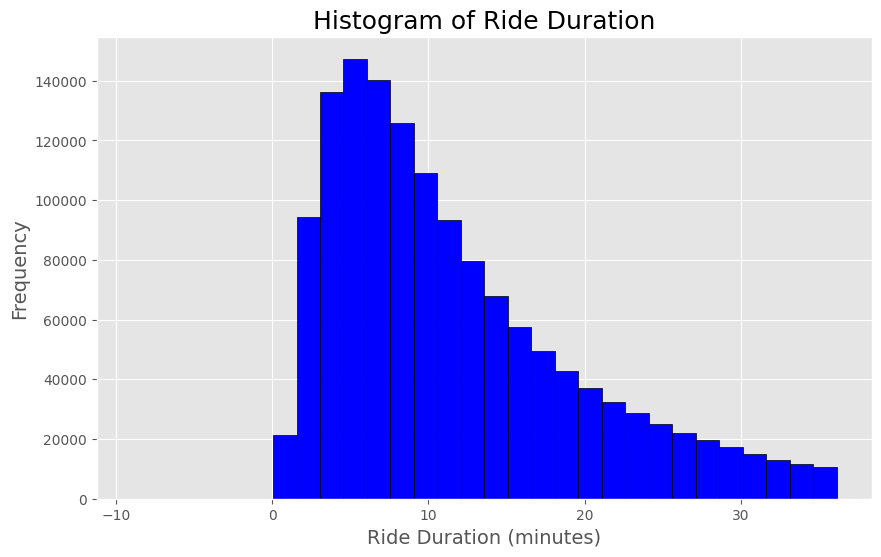

In [79]:
# Create a histogram for the 'ride_duration' column
plt.figure(figsize=(10, 6))  # Set the figure size


plt.hist(df_cleaned['ride_duration'], bins=30, color='blue', edgecolor='black')  


plt.xlabel('Ride Duration (minutes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Ride Duration', fontsize=18)


plt.show()

In [89]:
# save the plot as a file
fig.savefig('ride_duration_histogram.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [81]:
# Importing seaborn to add a curve to the histogram
import seaborn as sns

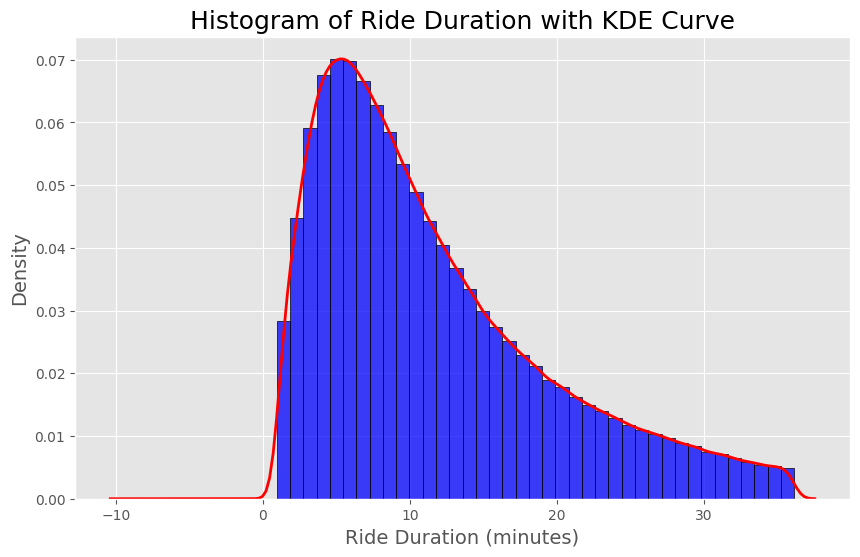

In [83]:
# Create a histogram for 'ride_duration' and add a curve
plt.figure(figsize=(10, 6))

sns.histplot(df_cleaned['ride_duration'], bins=50, kde=False, color='blue', edgecolor='black', stat='density')

#Add a KDE (Kernel Density Estimation) curve
sns.kdeplot(df_cleaned['ride_duration'], color='red', linewidth=2)

# Add labels and title
plt.xlabel('Ride Duration (minutes)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Histogram of Ride Duration with KDE Curve', fontsize=18)

# Show the plot
plt.show()

In [90]:
# save the plot as a file
fig.savefig('ride_duration_histogramline.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [87]:
df_cleaned.columns

Index(['ride_id', 'rideable_type', 'start_time', 'end_time',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', 'ride_duration', 'end_year',
       'end_month', 'end_day', 'end_weekday', 'end_hour', 'start_year',
       'start_month', 'start_day', 'start_weekday', 'start_hour',
       'bike_rides_daily', '_merge'],
      dtype='object')

### Creating a figure with two axes

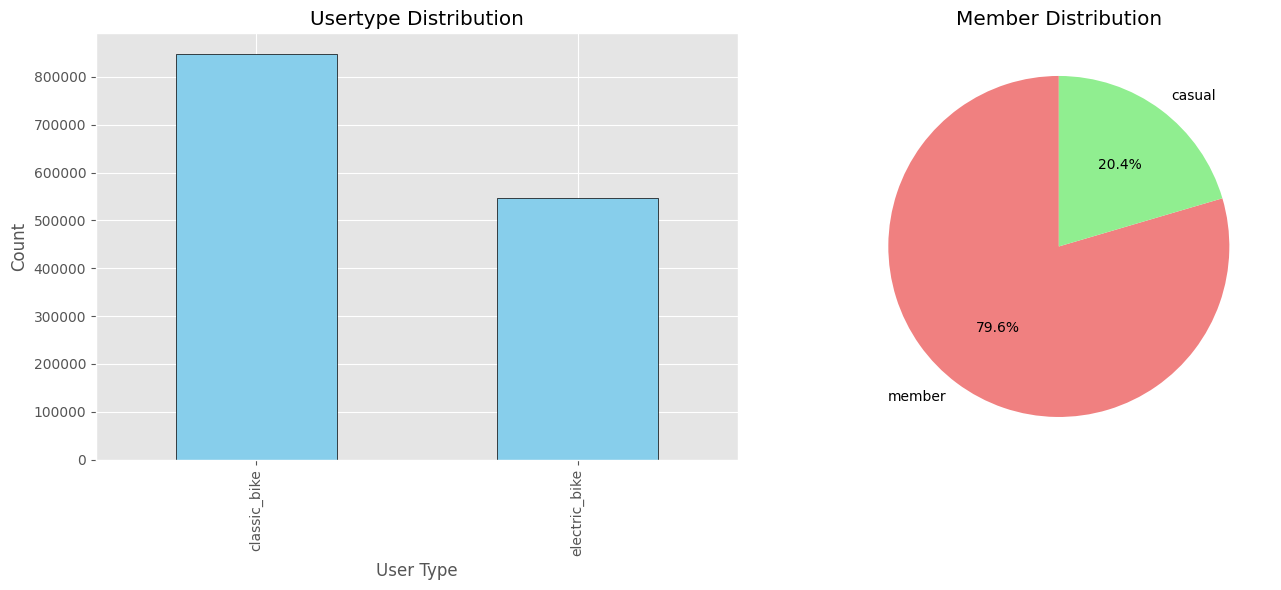

In [88]:
# Creating a figure with two axes to represent 'rideable type' and 'member casual' (if the rider is a member or not)
usertype_counts = df_cleaned['rideable_type'].value_counts()  
member_counts = df_cleaned['member_casual'].value_counts()     

# Create a figure with two axes (subplots)
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) 

# Plotting the bar chart on the first axis (ax[0])
usertype_counts.plot(kind='bar', ax=ax[0], color='skyblue', edgecolor='black')
ax[0].set_title('Usertype Distribution')  
ax[0].set_xlabel('User Type')  
ax[0].set_ylabel('Count')  

# Plotting the pie chart on the second axis (ax[1])
ax[1].pie(member_counts, labels=member_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
ax[1].set_title('Member Distribution')  

# Display the plot
plt.tight_layout()  
plt.show()

In [91]:
# save the plot as a file
fig.savefig('User&Membertype_bar&pie.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')